**Decision Trees** and **Random Forests** are foundational yet powerful techniques in Machine Learning, especially for classification and regression tasks.
---

## 📌 1. DECISION TREES

### 🧠 Concept:

A **Decision Tree** is a tree-like structure used for decision making. It splits the dataset into smaller subsets based on feature values, leading to a tree with decision nodes and leaf nodes.

* **Internal nodes**: Tests on features (e.g., "Is Age > 30?")
* **Leaf nodes**: Final prediction (e.g., "Class A")
* **Branches**: Outcome of a decision

> Imagine a flowchart that asks a sequence of questions to classify something.

---

### 🧮 Algorithm (Classification or Regression):

* For **Classification**:

  * Splits data to increase *purity* (make classes more homogenous).
  * Uses metrics like:

    * **Gini Index**
    * **Entropy & Information Gain**
* For **Regression**:

  * Splits to minimize **MSE (Mean Squared Error)**

---

### 📘 Example:

Let’s classify whether a person buys a computer based on their age and income.

| Age   | Income | Buys Computer |
| ----- | ------ | ------------- |
| <=30  | High   | No            |
| <=30  | Medium | Yes           |
| 31–40 | Low    | Yes           |
| >40   | Medium | Yes           |

A possible first split: "Is Age ≤ 30?" Then split on "Income".

---

### ✅ Pros:

* Easy to interpret
* Handles both numerical & categorical data
* Requires little data preprocessing

### ❌ Cons:

* Prone to **overfitting**
* Unstable (small changes in data can lead to a different tree)

---

### ✏️ Python Code (Decision Tree Classifier):

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# Load data
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Train Decision Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

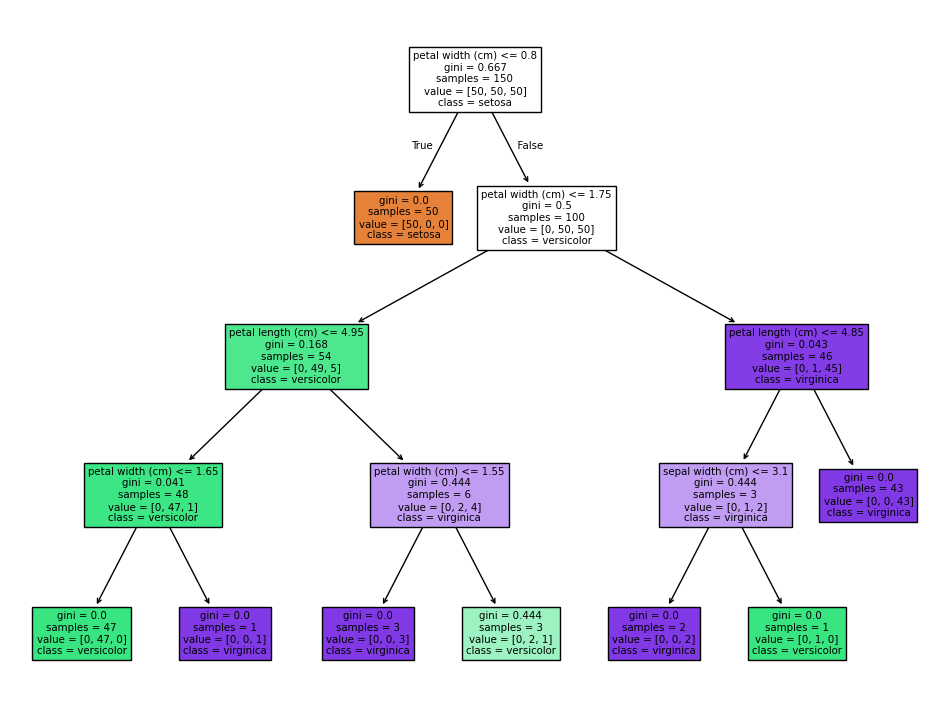

In [4]:
# Plot
plt.figure(figsize=(12,9))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In a **Decision Tree** in Machine Learning, the **square (or rectangular) boxes** usually represent the **nodes** of the tree, and here's what they show:

---

### 🔲 **What’s Inside the Square Boxes (Tree Nodes):**

Each box typically shows the following information:

---

### 🟩 **1. Internal Nodes (Decision Nodes):**

These are the **branches** or decision points in the tree.

Each square box shows:

```
feature_name <= threshold
samples = number of samples at this node
gini / entropy / mse = impurity measure
value = class distribution (for classification) or target value (for regression)
```

🔹 **Example (for classification):**

```
petal_length <= 2.45
gini = 0.5
samples = 100
value = [50, 50]
class = setosa
```

🔹 **Example (for regression):**

```
RM <= 6.941
mse = 12.3
samples = 40
value = 22.5
```

---

### 🟥 **2. Leaf Nodes (Terminal Nodes):**

These are the **end-points** of the tree. The model makes a final prediction here.

Each leaf node box typically shows:

* `samples`: How many training instances reached here
* `value`: For classification — count of each class; for regression — predicted value
* `class`: The predicted class (for classification)

---

### ✅ **Explanation of Terms:**

| Term               | Meaning                                                                 |
| ------------------ | ----------------------------------------------------------------------- |
| `feature_name`     | The feature on which the split is made                                  |
| `threshold`        | The value of the feature used to split the data                         |
| `samples`          | Number of training samples reaching the node                            |
| `gini` / `entropy` | Impurity measure (used in classification trees)                         |
| `mse` / `mae`      | Error measure (used in regression trees)                                |
| `value`            | Class distribution (e.g., \[40, 10]) or average prediction (regression) |
| `class`            | The predicted class at that node                                        |

---

### 📌 Visualization Example:

In scikit-learn’s `plot_tree()`, the nodes are shown like this:

```plaintext
petal width (cm) <= 0.8
gini = 0.168
samples = 50
value = [46, 4]
class = setosa
```


## 🌳 2. RANDOM FOREST

### 🧠 Concept:

A **Random Forest** is an ensemble of Decision Trees. It combines multiple trees to improve accuracy and reduce overfitting.

* Uses **Bagging (Bootstrap Aggregation)**:

  * Randomly samples data (with replacement) for each tree.
  * Randomly selects features at each split.
* The final prediction is:

  * **Majority vote** (for classification)
  * **Average** (for regression)

---

### 📘 Example:

Imagine 100 decision trees all trying to classify if an email is spam. Each tree gives a vote, and the **majority vote** decides the final label.

---

### 📊 Feature Importance:

Random Forests can measure **feature importance**:

```python
import pandas as pd
feat_importances = pd.Series(rf.feature_importances_, index=iris.feature_names)
feat_importances.sort_values().plot(kind='barh')
```

---

### ✅ Pros:

* High accuracy
* Handles missing values and noisy data
* Reduces overfitting
* Works well on large datasets

### ❌ Cons:

* Less interpretable
* Slower than a single tree
* Large model size

---

## 🤖 When to Use

| Use Case                       | Recommended Model |
| ------------------------------ | ----------------- |
| Small data, interpretability   | Decision Tree     |
| Complex problem, high accuracy | Random Forest     |

---

## 🧑‍🏫 Tips for Teaching Practically

1. **Show Visuals**:

   * Use `plot_tree()` to display how trees split the data.
   * Use feature importance bar charts for Random Forest.

2. **Demo on Real Datasets**:

   * Use `load_iris`, `load_wine`, `load_breast_cancer` from `sklearn`.

3. **Hands-On Challenge**:

   * Ask students to train both models and compare:

     * Accuracy
     * Overfitting
     * Feature importance
     * Model size
---

## 📚 Summary

| Aspect             | Decision Tree | Random Forest       |
| ------------------ | ------------- | ------------------- |
| Model Type         | Single Tree   | Ensemble of Trees   |
| Risk               | Overfitting   | Reduced Overfitting |
| Accuracy           | Moderate      | High                |
| Interpretability   | High          | Low                 |
| Speed (Training)   | Fast          | Slower              |
| Speed (Prediction) | Fast          | Medium              |

---


### ✏️ Python Code (Random Forest Classifier):

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# Load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [7]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

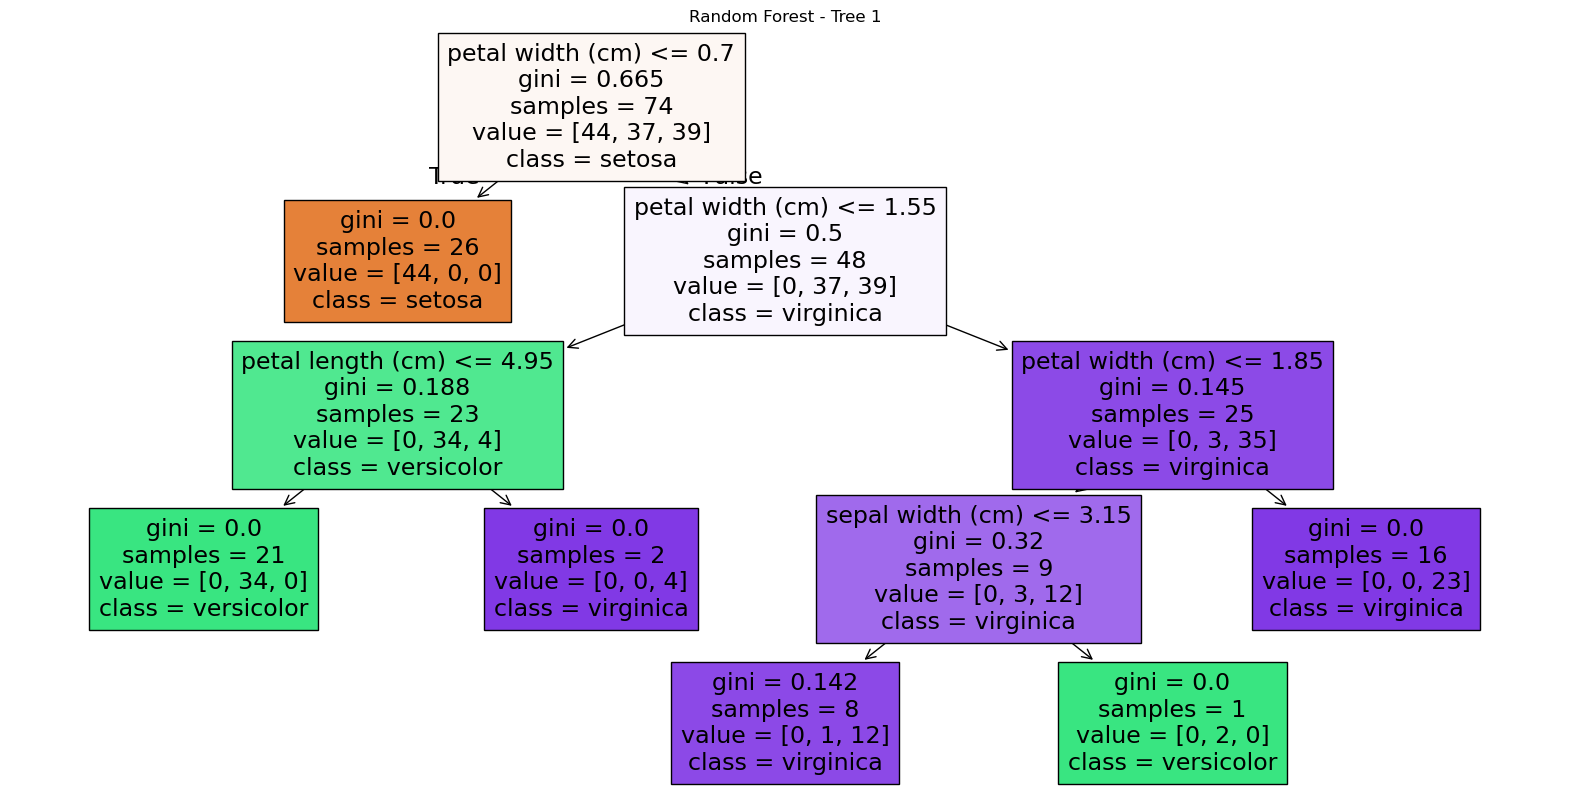

In [8]:
# Plot the first tree
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Random Forest - Tree 1")
plt.show()

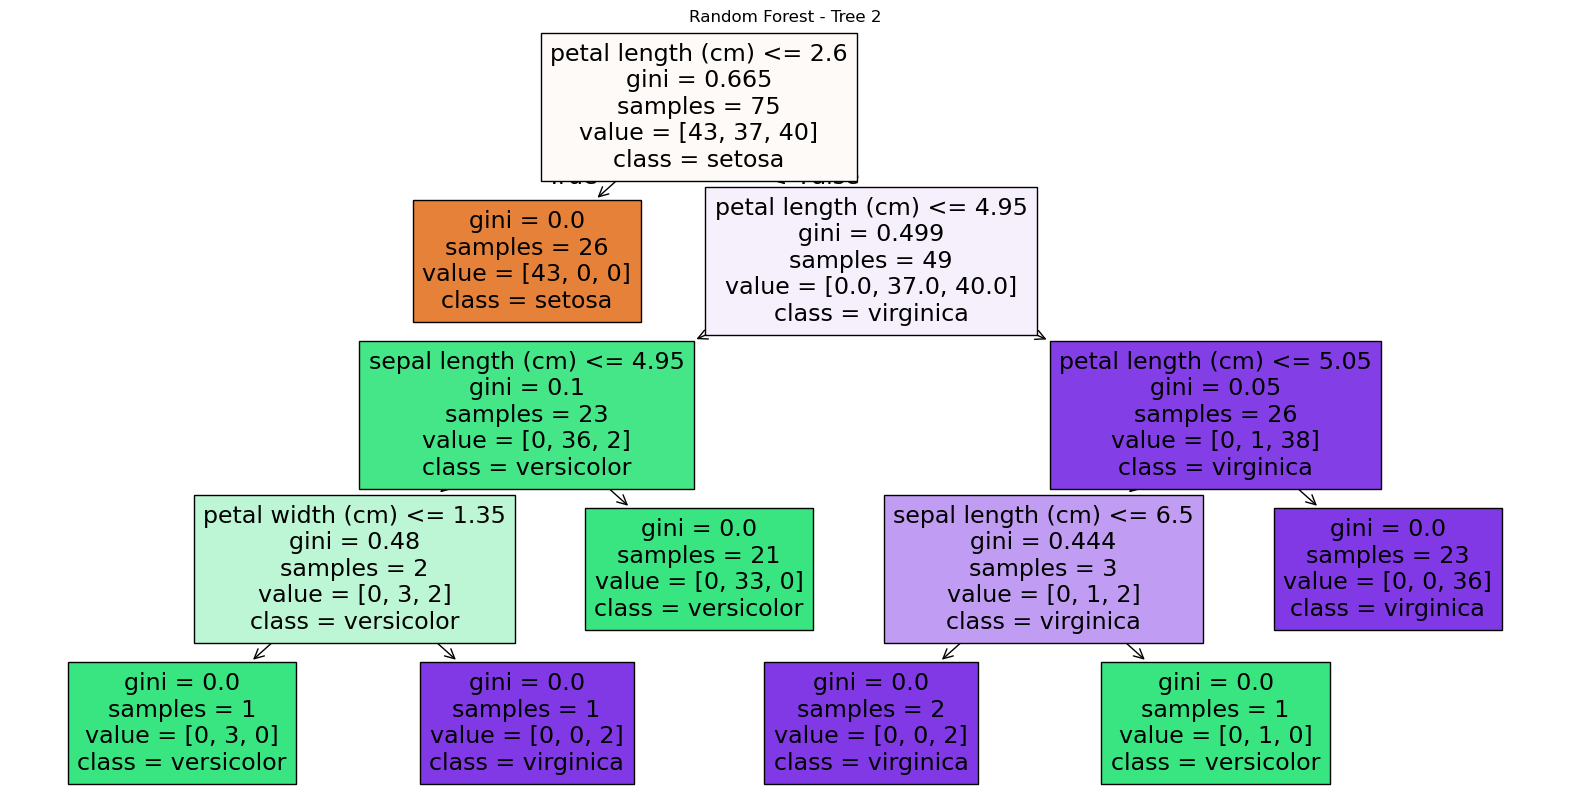

In [9]:
# Plot the first tree
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[1], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Random Forest - Tree 2")
plt.show()

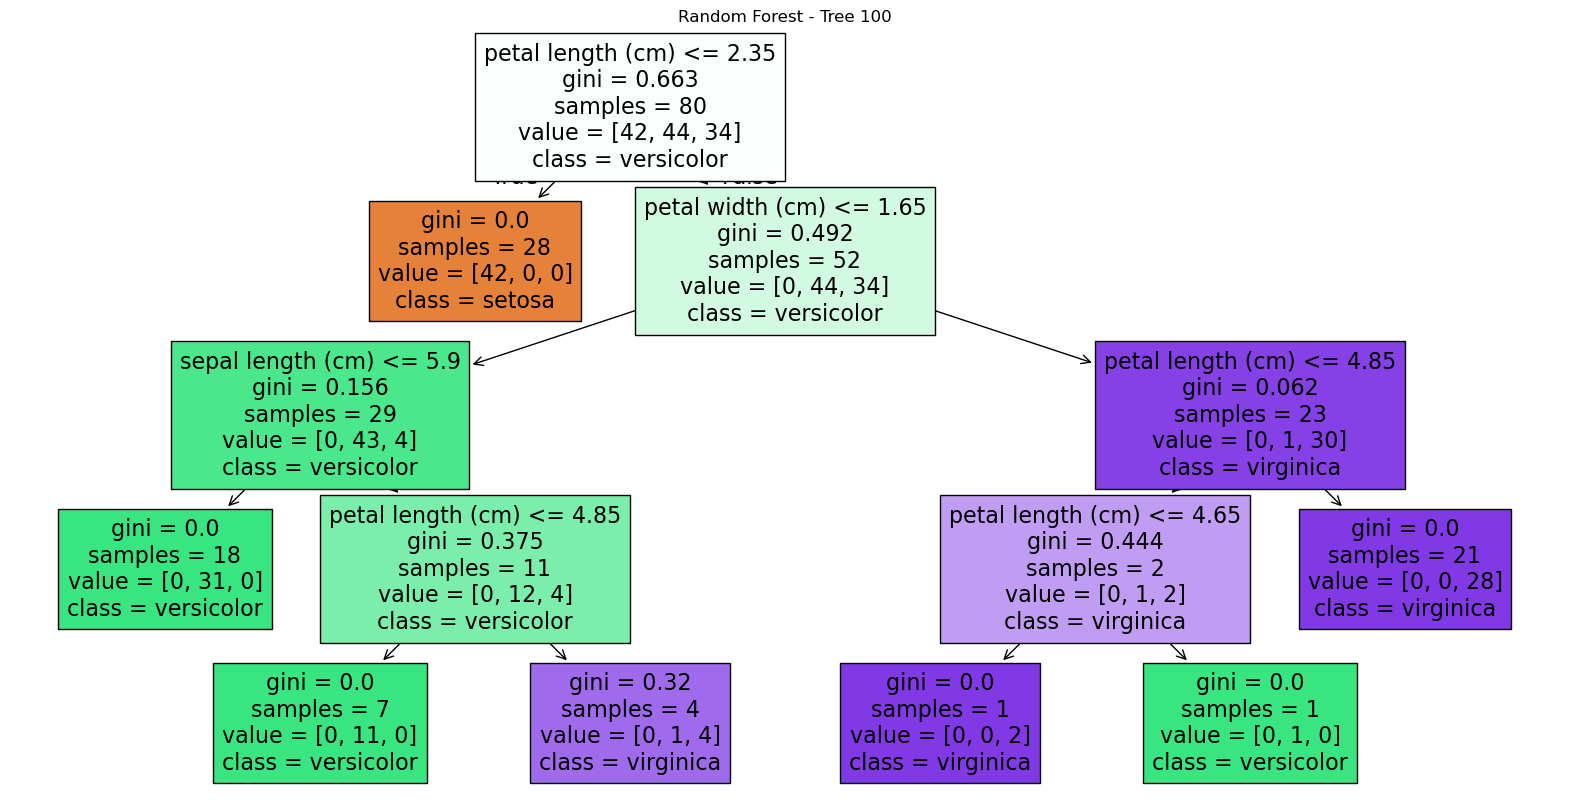

In [10]:
# Plot the first tree
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[99], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Random Forest - Tree 100")
plt.show()

In [11]:
# Predict & Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


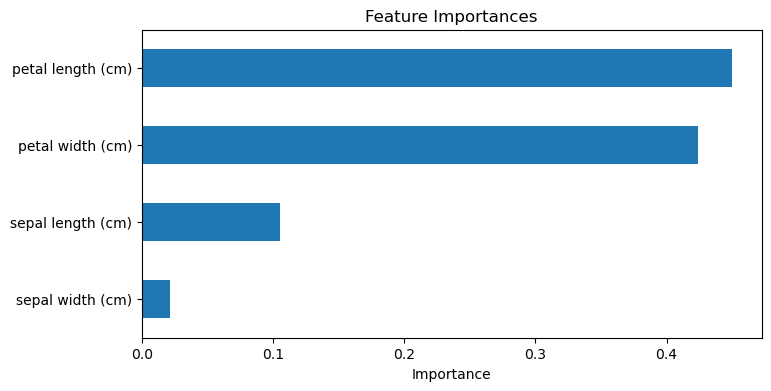

In [12]:
#This tells which features are most influential in the forest.
import pandas as pd

# Plot feature importances
importances = rf.feature_importances_
feat_names = iris.feature_names
feat_importances = pd.Series(importances, index=feat_names)
feat_importances.sort_values().plot(kind='barh', figsize=(8, 4), title='Feature Importances')
plt.xlabel("Importance")
plt.show()


Sure! Here's a detailed and beginner-friendly explanation for all 3 quiz questions, tailored for your ML internship training sessions:

---

## 🎯 **1. What is Information Gain?**

### 📘 **Definition:**

**Information Gain (IG)** measures how well a feature splits the dataset into classes. It is used in **Decision Trees** to decide **which feature to split on** at each step.

It is based on the concept of **Entropy** from Information Theory.

---

### 🔍 **Entropy**:

Entropy measures **impurity or randomness** in data.
For binary classification:

$$
\text{Entropy}(S) = -p_1 \log_2 p_1 - p_2 \log_2 p_2
$$

* `p1` and `p2` are the probabilities of class 1 and class 2.
* If all samples belong to the same class, entropy = 0 (pure).
* If classes are equally mixed, entropy = 1 (impure).

---

### 🧮 **Information Gain Formula**:

$$
IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)
$$

Where:

* $S$ is the entire dataset
* $A$ is the attribute (feature) to split on
* $S_v$ is the subset where feature $A = v$

---

### 💡 **Intuition:**

* IG tells how much **“information” (or reduction in entropy)** we gain by splitting on a feature.
* Higher IG → better feature for splitting.

---

### ✅ **Example:**

Let’s say a dataset has 10 students—5 passed, 5 failed → Entropy = 1 (maximum uncertainty).
If we split them based on study time (low/high), and each group becomes purer (like all “high” passed), then Information Gain is high.

---

## 🌲 **2. Why does Random Forest perform better?**

### ✅ **Reasons Why Random Forest Outperforms Single Decision Trees:**

| Reason                     | Explanation                                                                                  |
| -------------------------- | -------------------------------------------------------------------------------------------- |
| 🎯 **Reduces Overfitting** | By averaging multiple trees, it cancels out the noise of individual trees.                   |
| 🔀 **Randomization**       | Each tree is trained on a random subset of data and features (Bagging + Feature Randomness). |
| 🧠 **Generalizes Better**  | Ensemble of trees learns various patterns, making it less biased.                            |
| 🎲 **Robust to Noise**     | Outliers or noise have less effect because not all trees see them.                           |

---

### 📘 Summary:

> A single tree may **memorize** the training data (overfit), but a forest of diverse trees tends to **generalize** better on unseen data.

---

## 🤖 **3. Difference Between Bagging and Boosting**

### 📊 Bagging vs Boosting:

| Feature          | **Bagging**                                                   | **Boosting**                                             |
| ---------------- | ------------------------------------------------------------- | -------------------------------------------------------- |
| 🎯 Goal          | Reduce **variance**                                           | Reduce **bias and variance**                             |
| 🌳 Model         | Trains **multiple models in parallel**                        | Trains **models sequentially**                           |
| 🧠 Learning      | Each model is trained **independently**                       | Each new model **learns from errors** of the previous    |
| 💡 Data Sampling | Uses **bootstrap sampling** (random subsets with replacement) | Each new model focuses more on **misclassified** samples |
| 🛠️ Example      | **Random Forest**                                             | **AdaBoost, Gradient Boosting, XGBoost**                 |
| 📉 Overfitting   | Less prone than single models                                 | Can overfit if not regularized                           |

---

### 🔍 Analogy:

* **Bagging** is like asking **100 people independently** and taking a vote.
* **Boosting** is like having **a chain of experts**, where each expert learns from the previous one's mistakes.

---

### ✅ Use in ML:

| Scenario                                                       | Use                                 |
| -------------------------------------------------------------- | ----------------------------------- |
| You want simple, stable improvement with less tuning           | Go with **Bagging (Random Forest)** |
| You want highly accurate results and are okay with more tuning | Use **Boosting (XGBoost, etc.)**    |

---

## 📚 Summary for Students:

| Topic                     | Key Point                                                                     |
| ------------------------- | ----------------------------------------------------------------------------- |
| Information Gain          | Measures how much a feature reduces uncertainty (entropy)                     |
| Random Forest Superiority | Combines trees to reduce overfitting and improve accuracy                     |
| Bagging vs Boosting       | Bagging trains in parallel, Boosting trains in sequence and focuses on errors |

---